In [71]:
import nltk
import wordcloud
nltk.download("stopwords")
import pandas as pd
import string
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
df = pd.read_csv("/content/emails.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.dtypes

text    object
spam     int64
dtype: object

<ipython-input-11-9d797b01b27c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spam'],kde=True)


<Axes: xlabel='spam', ylabel='Density'>

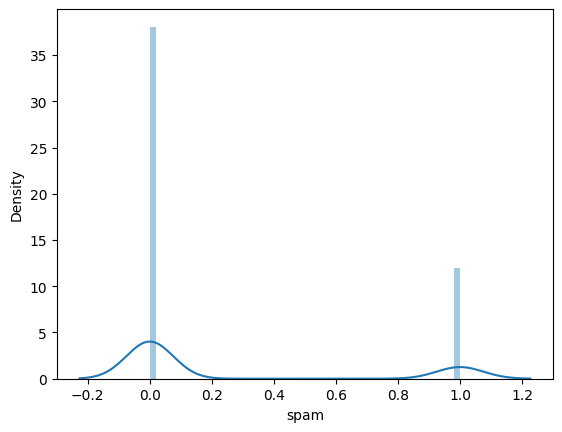

In [ ]:
sns.distplot(df['spam'],kde=True)

<Axes: xlabel='spam', ylabel='length'>

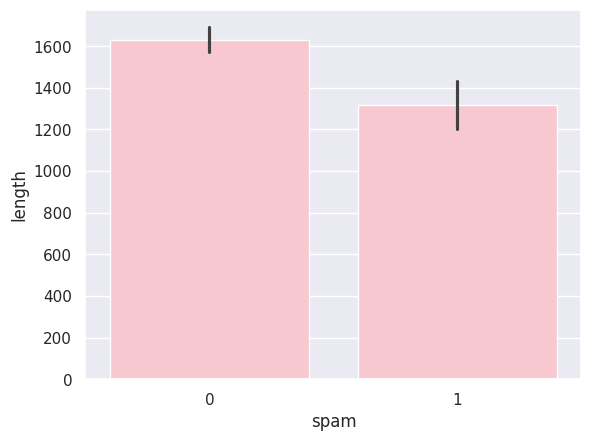

In [ ]:
df["length"] = df ["text"].apply(len)
sns.barplot(x="spam", y="length",data=df, color="pink")

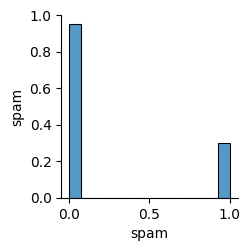

In [ ]:
sns.pairplot(df,kind="scatter")
plt.show()

<Axes: xlabel='length', ylabel='spam'>

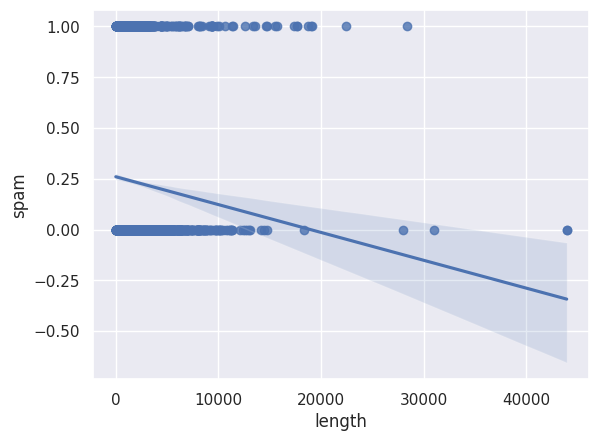

In [ ]:
sns.set(style="darkgrid")
sns.regplot(x=df['length'], y=df['spam'],fit_reg =True)


In [55]:
print("count of spam:", df['spam'].value_counts())

count of spam: spam
0    4360
1    1368
Name: count, dtype: int64


In [66]:
print("Not a spam email ratio", round(len(df[df["spam"]==0])/(df["spam"]),2)*100,"%")

Not a spam email ratio 0       436000.0
1       436000.0
2       436000.0
3       436000.0
4       436000.0
          ...   
5723         inf
5724         inf
5725         inf
5726         inf
5727         inf
Name: spam, Length: 5728, dtype: float64 %


In [64]:
print("spam email ratio", round(len(df[df["spam"]==1])/(df["spam"]),2)*100,"%")

spam email ratio 0       136800.0
1       136800.0
2       136800.0
3       136800.0
4       136800.0
          ...   
5723         inf
5724         inf
5725         inf
5726         inf
5727         inf
Name: spam, Length: 5728, dtype: float64 %


In [67]:
df["length"]=df.text.str.len()

In [68]:
df.head(1)


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484


,text,spam,length
0,subject: naturally irresistible your corporate...,1,1484


In [90]:
class PreProcessText(object):
    def _init_(self):
        pass

    def __remove_punctuation(self, text):

        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)

        return message

    def __remove_stopwords(self, text):

        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words


    def token_words(self,text=''):

        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [91]:
m = 'this is a data science project'
obj = PreProcessText()
words = obj.token_words(m)
print(words)

['data', 'science', 'project']


In [93]:

df["text"].head(2).apply(obj.token_words)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
Name: text, dtype: object

In [94]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(df["text"])

In [95]:
messages_bow = bow_transformer.transform(df["text"])

In [96]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [98]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [99]:
model = MultinomialNB().fit(messages_tfidf,df["spam"])

In [100]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)

In [101]:
pred.head(10)

,0
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,0
9,1
